# Modelación y Simulación - Laboratorio 2 Ejercicios 4 al 8
### Ana Laura Tschen 221645
### Sebastian Garcia 22291

## Ejercicio 4

Implementación en Python de los tres algoritmos vistos en clase para hallar los ceros de una función $f : [a, b] \rightarrow \mathbb{R}$.


- Método de **bisección**
- Método de **la secante**
- Método de **Newton-Raphson**

### Parámetros de entrada

Cada uno de los algoritmos deberá recibir como parámetros:

- La función \( f(x) \)
- La derivada \( f'(x) \) (solo en el caso del método de Newton-Raphson)
- Un intervalo \([a, b]\) o un punto inicial de búsqueda \( x_0 \in \mathbb{R} \)
- Un número máximo de iteraciones `max_iter`
- Una tolerancia `tol > 0` para detener la búsqueda

### Salida esperada

Cada función deberá devolver:

- El valor aproximado de la raíz encontrada $x^*$
- El número de iteraciones realizadas
- Una lista con las aproximaciones generadas durante el proceso


In [1]:
import math
def bisection(f, a, b, tol=1e-12, max_iter=1000):
    fa, fb = f(a), f(b)
    if fa*fb > 0:
        raise ValueError("El intervalo no cambia de signo.")
    xs = []
    for k in range(1, max_iter+1):
        m  = 0.5*(a + b)
        fm = f(m)
        xs.append(m)
        if abs(fm) < tol or 0.5*(b - a) < tol:
            return m, k, xs
        if fa*fm < 0:
            b, fb = m, fm
        else:
            a, fa = m, fm
    return m, k, xs

def secant(f, x0, x1, tol=1e-12, max_iter=1000):
    xs = [x0, x1]
    f0, f1 = f(x0), f(x1)
    for k in range(2, max_iter+1):
        if f1 == f0:
            raise ZeroDivisionError("Secante: f(x1) == f(x0).")
        x2 = x1 - f1*(x1 - x0)/(f1 - f0)
        xs.append(x2)
        if not math.isfinite(x2):
            raise FloatingPointError("Secante produjo un valor no finito.")
        if abs(f(x2)) < tol and abs(x2 - x1) < tol:
            return x2, k-1, xs
        x0, x1 = x1, x2
        f0, f1 = f1, f(x1)
    return x1, k-1, xs

def newton(f, df, x0, tol=1e-12, max_iter=1000, damping=True):
    xs = [x0]
    x  = x0
    for k in range(1, max_iter+1):
        fx, dfx = f(x), df(x)
        if not math.isfinite(fx) or not math.isfinite(dfx) or dfx == 0.0:
            raise FloatingPointError("Derivada no válida en Newton.")
        step = fx/dfx
        xn   = x - step
        if damping:
            alpha = 1.0
            for _ in range(30):
                if (abs(xn - 7.0) < 1e-12) or (not math.isfinite(xn)) or (abs(f(xn)) > abs(fx)):
                    alpha *= 0.5
                    xn = x - alpha*step
                else:
                    break
        xs.append(xn)
        if abs(f(xn)) < tol and abs(xn - x) < tol:
            return xn, k, xs
        x = xn
    return x, k, xs

In [11]:
# Definición de la función y su derivada
def f(x):
    return x**3 - 2*x**2 - 5

def df(x):
    return 3*x**2 - 4*x


# --- Método de bisección ---
raiz_b, it_b, aprox_b = bisection(f, 2, 3)
print("Bisección:")
print(f"Raíz ≈ {raiz_b}, Iteraciones: {it_b}")
print(f"Aproximaciones: {aprox_b}\n")

# --- Método de la secante ---
raiz_s, it_s, aprox_s = secant(f, 2, 3)
print("Secante:")
print(f"Raíz ≈ {raiz_s}, Iteraciones: {it_s}")
print(f"Aproximaciones: {aprox_s}\n")

# --- Método de Newton-Raphson ---
raiz_n, it_n, aprox_n = newton(f, df, 2.5)
print("Newton-Raphson:")
print(f"Raíz ≈ {raiz_n}, Iteraciones: {it_n}")
print(f"Aproximaciones: {aprox_n}\n")


Bisección:
Raíz ≈ 2.6906474480283578, Iteraciones: 40
Aproximaciones: [2.5, 2.75, 2.625, 2.6875, 2.71875, 2.703125, 2.6953125, 2.69140625, 2.689453125, 2.6904296875, 2.69091796875, 2.690673828125, 2.6905517578125, 2.69061279296875, 2.690643310546875, 2.6906585693359375, 2.6906509399414062, 2.6906471252441406, 2.6906490325927734, 2.690648078918457, 2.690647602081299, 2.6906473636627197, 2.6906474828720093, 2.6906474232673645, 2.690647453069687, 2.6906474381685257, 2.6906474456191063, 2.6906474493443966, 2.6906474474817514, 2.690647448413074, 2.6906474479474127, 2.6906474481802434, 2.690647448063828, 2.6906474480056204, 2.690647448034724, 2.6906474480201723, 2.6906474480274483, 2.6906474480310862, 2.6906474480292673, 2.6906474480283578]

Secante:
Raíz ≈ 2.690647448028614, Iteraciones: 7
Aproximaciones: [2, 3, 2.5555555555555554, 2.669050051072523, 2.6923687599155453, 2.690626684585095, 2.690647428234295, 2.690647448028842, 2.690647448028614]

Newton-Raphson:
Raíz ≈ 2.6906474480286136, It

## Ejercicio 5: Hallar todos los ceros de la función $g(x) = x^2 + 1/(x − 7)$ con al menos 7 decimales de precisión. Compare las soluciones obtenidas con cada uno de los algoritmos anterioes en términos del número de iteraciones.


In [3]:
def g(x):
    return x**2 + 1.0/(x - 7.0)

def gp(x):
    # d/dx [1/(x-7)] = -1/(x-7)^2
    return 2.0*x - 1.0/((x - 7.0)**2)

intervals = [(-1.0, 0.0), (0.0, 1.0), (6.95, 6.98)]
seeds     = [-0.5, 0.5, 6.96]   # semillas para Newton
results = []
for (a, b), x0 in zip(intervals, seeds):
    rb, nb, _ = bisection(g, a, b)                
    rs, ns, _ = secant(g, a, b)                    
    rn, nn, _ = newton(g, gp, x0)                  

    results.append({
        "intervalo/semillas": f"[{a}, {b}] / x0={x0}",
        "biseccion_root": rb,
        "biseccion_iter": nb,
        "secante_root":   rs,
        "secante_iter":   ns,
        "newton_root":    rn,
        "newton_iter":    nn
    })


print("Ceros de g(x)=x^2 + 1/(x-7) con ≥7 decimales y #iteraciones:\n")
for i, r in enumerate(results, 1):
    print(f"Raíz #{i}  (intervalo/semillas: {r['intervalo/semillas']})")
    print(f"  Bisección:  x* = {r['biseccion_root']:.7f}  | iters = {r['biseccion_iter']}")
    print(f"  Secante:    x* = {r['secante_root']  :.7f}  | iters = {r['secante_iter']}")
    print(f"  Newton:     x* = {r['newton_root']   :.7f}  | iters = {r['newton_iter']}")
    print()


Ceros de g(x)=x^2 + 1/(x-7) con ≥7 decimales y #iteraciones:

Raíz #1  (intervalo/semillas: [-1.0, 0.0] / x0=-0.5)
  Bisección:  x* = -0.3683949  | iters = 38
  Secante:    x* = -0.3683949  | iters = 10
  Newton:     x* = -0.3683949  | iters = 5

Raíz #2  (intervalo/semillas: [0.0, 1.0] / x0=0.5)
  Bisección:  x* = 0.3889232  | iters = 38
  Secante:    x* = 0.3889232  | iters = 10
  Newton:     x* = 0.3889232  | iters = 5

Raíz #3  (intervalo/semillas: [6.95, 6.98] / x0=6.96)
  Bisección:  x* = 6.9794716  | iters = 35
  Secante:    x* = 6.9794716  | iters = 6
  Newton:     x* = 6.9794716  | iters = 5



# Ejercicio 6:
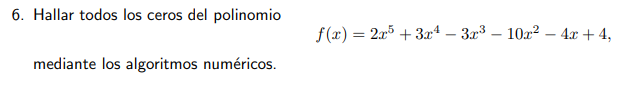

In [9]:
def f(x):
    return 2*x**5 + 3*x**4 - 3*x**3 - 10*x**2 - 4*x + 4

def df(x):
    return 10*x**4 + 12*x**3 - 9*x**2 - 20*x - 4

intervalos = []
a = -5
b = 5
paso = 0.5

x = a
while x < b:
    x1 = x
    x2 = x + paso
    if f(x1) * f(x2) < 0:
        intervalos.append((x1, x2))
    x += paso

print("Intervalos con cambio de signo:")
for i in intervalos:
    print(f"[{i[0]:.2f}, {i[1]:.2f}]")

def redondear(lista, decimales=6):
    return sorted(set([round(x, decimales) for x in lista]))

raices_biseccion = []
raices_secante = []
raices_newton = []

for (a, b) in intervalos:
    try:
        # Bisección
        r_b, _, _ = bisection(f, a, b)
        raices_biseccion.append(r_b)

        # Secante
        r_s, _, _ = secant(f, a, b)
        raices_secante.append(r_s)

        # Newton-Raphson
        x0 = (a + b)/2
        
        r_n, _, _ = newton(f, df, x0)
        raices_newton.append(r_n)
    except Exception as e:
        print(f"Error en intervalo [{a}, {b}]: {e}")

print("Raíces encontradas con Bisección:")
for r in redondear(raices_biseccion):
    print(f"x ≈ {r:.8f}")

print("\nRaíces encontradas con Secante:")
for r in redondear(raices_secante):
    print(f"x ≈ {r:.8f}")

print("\nRaíces encontradas con Newton-Raphson:")
for r in redondear(raices_newton):
    print(f"x ≈ {r:.8f}")


Intervalos con cambio de signo:
[-1.50, -1.00]
[0.00, 0.50]
[1.50, 2.00]
Raíces encontradas con Bisección:
x ≈ -1.30370300
x ≈ 0.45460800
x ≈ 1.59374000

Raíces encontradas con Secante:
x ≈ -1.30370300
x ≈ 0.45460800
x ≈ 1.59374000

Raíces encontradas con Newton-Raphson:
x ≈ -1.30370300
x ≈ 0.45460800
x ≈ 1.59374000


## Ejercicio 7. Considere la función $f(x) = x^3 − 2x + 2$. Vamos a utilizar el método de Newton-Raphson con el punto inicial $x_0 = 0$ para hallar un cero de este polinomio.

## (a) Comenzando en x0. ¿Converge el método a la solución requerida? ¿Por qué? Explique qué ocurre con las iteraciones.


Sea
$$
f(x)=x^3-2x+2,\qquad f'(x)=3x^2-2.
$$
El método de Newton:
$$
x_{k+1}=x_k-\frac{f(x_k)}{f'(x_k)}.
$$

**Iteraciones desde $x_0=0$:**
$$
\begin{aligned}
x_1 &= 0 - \frac{f(0)}{f'(0)} = 0 - \frac{2}{-2} = 1,\\[4pt]
x_2 &= 1 - \frac{f(1)}{f'(1)} = 1 - \frac{1}{1} = 0.
\end{aligned}
$$

**Tabla de iteraciones**
| k | $x_k$ | $f(x_k)$ | $f'(x_k)$ |
|---:|---:|---:|---:|
| 0 | 0 | 2 | -2 |
| 1 | 1 | 1 | 1 |
| 2 | 0 | 2 | -2 |
| 3 | 1 | 1 | 1 |

$$
\boxed{\text{Conclusión: Desde } x_0=0 \text{ el método de Newton no converge; entra en el ciclo } 0\leftrightarrow1.}
$$

## (b) Diseñe una estrategia para resolver el cero requerido

In [2]:
def newton_step(f, fp, x):
    return x - f(x)/fp(x)

f  = lambda x: x**3 - 2*x + 2
fp = lambda x: 3*x**2 - 2

x = 0.0
iters = [x]
for _ in range(6):
    x = newton_step(f, fp, x)
    iters.append(x)

print("Iteraciones Newton desde x0=0:", iters)


Iteraciones Newton desde x0=0: [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0]


In [3]:
def newton_guarded(f, fp, x0, tol=1e-12, max_iter=100, alpha_min=1e-6):
    x = x0
    fx = f(x)
    for k in range(1, max_iter+1):
        dfx = fp(x)
        if dfx == 0.0:
            raise ZeroDivisionError("f'(x)=0; intenta otra semilla.")
        step = fx/dfx
        alpha = 1.0
        # Backtracking simple
        while True:
            xn = x - alpha*step
            fn = f(xn)
            if abs(fn) <= 0.9*abs(fx) or alpha < alpha_min:
                break
            alpha *= 0.5
        x, fx = xn, fn
        if abs(fx) < tol:
            return x, k
    return x, max_iter

root, niter = newton_guarded(f, fp, x0=-1.5)
print(f"Raíz ≈ {root:.10f}  | iters = {niter}")


Raíz ≈ -1.7692923542  | iters = 5


In [4]:
def bisection(f, a, b, tol=1e-6, max_iter=200):
    fa, fb = f(a), f(b)
    if fa*fb > 0:
        raise ValueError("No hay cambio de signo en [a,b].")
    for _ in range(max_iter):
        m = 0.5*(a+b)
        fm = f(m)
        if abs(fm) < tol or 0.5*(b-a) < tol:
            return m
        if fa*fm < 0:
            b, fb = m, fm
        else:
            a, fa = m, fm
    return 0.5*(a+b)
m0 = bisection(f, -2.0, -1.0, tol=1e-3)
xN, kN = newton_guarded(f, fp, m0, tol=1e-12)
print(f"Bisección→Newton: raíz ≈ {xN:.10f}  | iters Newton = {kN}")


Bisección→Newton: raíz ≈ -1.7692923542  | iters Newton = 2


# Ejercicio 8: 
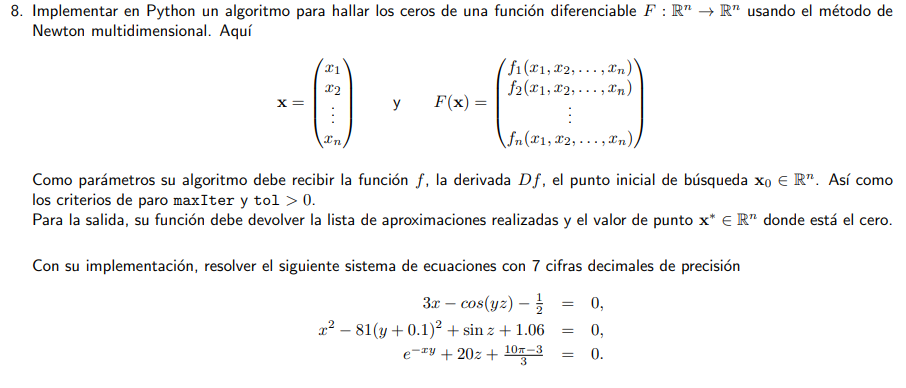

In [10]:
import numpy as np

def newton_system(F, J, x0, tol=1e-8, max_iter=100):
    xs = [x0.copy()]
    x = x0.copy()

    for k in range(max_iter):
        Fx = F(x)
        Jx = J(x)

        try:
            delta = np.linalg.solve(Jx, -Fx)
        except np.linalg.LinAlgError:
            raise ValueError("Jacobiana no invertible en la iteración", k)

        x = x + delta
        xs.append(x.copy())

        if np.linalg.norm(delta, ord=2) < tol:
            return x, k+1, xs

    raise ValueError("No se alcanzó la convergencia después de", max_iter, "iteraciones.")

def F(x):
    x1, x2, x3 = x
    f1 = 3*x1 - np.cos(x2*x3) - 0.5
    f2 = x1**2 - 81*(x2 + 0.1)**2 + np.sin(x3) + 1.06
    f3 = np.exp(-x1*x2) + 20*x3 + (10*np.pi - 3)/3
    return np.array([f1, f2, f3])

def J(x):
    x1, x2, x3 = x
    df1_dx1 = 3
    df1_dx2 = np.sin(x2*x3)*x3
    df1_dx3 = np.sin(x2*x3)*x2

    df2_dx1 = 2*x1
    df2_dx2 = -162*(x2 + 0.1)
    df2_dx3 = np.cos(x3)

    df3_dx1 = -x2*np.exp(-x1*x2)
    df3_dx2 = -x1*np.exp(-x1*x2)
    df3_dx3 = 20

    return np.array([
        [df1_dx1, df1_dx2, df1_dx3],
        [df2_dx1, df2_dx2, df2_dx3],
        [df3_dx1, df3_dx2, df3_dx3]
    ])

x0 = np.array([0.1, 0.1, -0.1])
sol, it, tray = newton_system(F, J, x0, tol=1e-7)

print("Raíz encontrada con 7 cifras decimales:")
print(f"x* ≈ {sol}")
print(f"Iteraciones: {it}")


Raíz encontrada con 7 cifras decimales:
x* ≈ [ 5.00000000e-01  3.35521889e-18 -5.23598776e-01]
Iteraciones: 5
